In [145]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt


from obspy import read
from obspy.core import UTCDateTime as UT

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16

The catalogs were retrieved from the NEIC PDE database, available at ftp://hazards.cr.usgs.gov/NEICPDE/quakeml/.
These catalogs were turned into csv files that contain the phase for
information for a given earthquake at a given station.

In [223]:
df = pd.read_csv('quakeml/201330_cat_quakeml.csv')
df = df.fillna('NaN')                       # small detail
df = df[(df['Pg']!='NaN')&(df['Sg']!='NaN')]
df

,Unnamed: 0,network,station,channel,P,Pg,Pn,S,Sg,Sn,...,origin_latitude,origin_latitude_uncertainty,origin_longitude,origin_longitude_uncertainty,depth,depth_uncertainty,origin_ID,distance,azimuth,takeoff_angle
28,28,AK,EYAK,BH,NaN,2013-07-23T01:13:09.520000Z,NaN,NaN,2013-07-23T01:13:17.250000Z,NaN,...,60.7970,0.0333,-146.8330,0.0162,16700.0,5900.0,20130723011259_60_-146,0.588497,114.57600,78.3
158,158,IU,SNZO,BH,NaN,2013-07-23T02:03:17.510000Z,NaN,NaN,2013-07-23T02:03:22.760000Z,NaN,...,-41.6449,0.0360,174.2226,0.0269,7990.0,6000.0,wel_locationdisp_20130818230334_-42_174,0.493819,47.29720,81.6
159,159,NZ,NNZ,HH,NaN,2013-07-23T02:03:21.620000Z,NaN,NaN,2013-07-23T02:03:31.580000Z,NaN,...,-41.6449,0.0360,174.2226,0.0269,7990.0,6000.0,wel_locationdisp_20130818230334_-42_174,0.763764,303.59800,84.4
1360,1360,CI,OSI,BH,NaN,2013-07-23T12:40:14.720000Z,NaN,NaN,2013-07-23T12:40:23.980000Z,NaN,...,33.9223,0.0306,-118.4717,0.0254,11800.0,6400.0,11338562,0.721288,343.26600,81.6
4179,4179,IU,SNZO,BH,NaN,2013-07-25T01:59:06.240000Z,NaN,NaN,2013-07-25T01:59:13.460000Z,NaN,...,-41.7391,0.0531,174.1561,0.0396,5120.0,6700.0,wel_locationdisp_20130820035237_-42_174,0.595296,43.92920,85.7
4504,4504,CN,MNTQ,BH,NaN,2013-07-25T07:43:04.850000Z,NaN,NaN,2013-07-25T07:43:11.680000Z,NaN,...,45.9520,0.0198,-73.8000,0.0138,18000.0,1900.0,ott_createeventdisp_20130905113231_46_-74,0.468507,164.57300,71.1
4506,4506,CN,TRQ,EH,NaN,2013-07-25T07:43:07.280000Z,NaN,NaN,2013-07-25T07:43:15.230000Z,NaN,...,45.9520,0.0198,-73.8000,0.0138,18000.0,1900.0,ott_createeventdisp_20130905113231_46_-74,0.586535,297.19100,77.7
4514,4514,GS,ADOK,HN,NaN,2013-07-25T08:52:13.480000Z,NaN,NaN,2013-07-25T08:52:19.890000Z,NaN,...,36.1000,0.0441,-97.0520,0.0356,5500.0,3500.0,tul_createeventdisp_20130726065512_36_-97,0.516733,210.19500,84.2
4517,4517,TA,TUL1,BH,NaN,2013-07-25T08:52:22.860000Z,NaN,NaN,2013-07-25T08:52:36.620000Z,NaN,...,36.1000,0.0441,-97.0520,0.0356,5500.0,3500.0,tul_createeventdisp_20130726065512_36_-97,1.039100,100.12000,50.2
4532,4532,NZ,NNZ,HH,NaN,2013-07-25T09:48:23.170000Z,NaN,NaN,2013-07-25T09:48:33.710000Z,NaN,...,-41.6798,0.0171,174.2614,0.0128,14430.0,5500.0,wel_locationdisp_20130905115544_-42_174,0.807378,304.49200,81.2


In [224]:
df.columns

Index(['Unnamed: 0', 'network', 'station', 'channel', 'P', 'Pg', 'Pn', 'S',
       'Sg', 'Sn', 'P_weight', 'Pg_weight', 'Pn_weight', 'S_weight',
       'Sg_weight', 'Sn_weight', 'P_evaluation_mode', 'Pg_evaluation_mode',
       'Pn_evaluation_mode', 'S_evaluation_mode', 'Sg_evaluation_mode',
       'Sn_evaluation_mode', 'origin_time', 'origin_time_uncertainty',
       'origin_latitude', 'origin_latitude_uncertainty', 'origin_longitude',
       'origin_longitude_uncertainty', 'depth', 'depth_uncertainty',
       'origin_ID', 'distance', 'azimuth', 'takeoff_angle'],
      dtype='object')

Later, the download of the waveforms for each of those traces is attempted via Obspy, by querying all of the servers and networks available.
The names of the waveforms is like follows.


In [225]:
def pair_data_waveforms(df,phase):
    pairs = []
    df['wavenames'] = df['network']+'.'+df['station']+'.'+df[phase]+'.'+phase+'.mseed'
    for i,row in df.iterrows():
        try:
            st = read('mseedfiles/'+row['wavenames'])
            #print(st)
            pair = [row,st]
            pairs.append(pair)
        except Exception as e:
            'No waveforms found'
            
    return pairs

In [226]:
pgpairs = pair_data_waveforms(df,'Pg')

In [227]:
pgpairs[0]

[Unnamed: 0                                                                28
 network                                                                   AK
 station                                                                 EYAK
 channel                                                                   BH
 P                                                                        NaN
 Pg                                               2013-07-23T01:13:09.520000Z
 Pn                                                                       NaN
 S                                                                        NaN
 Sg                                               2013-07-23T01:13:17.250000Z
 Sn                                                                       NaN
 P_weight                                                                 NaN
 Pg_weight                                                                  0
 Pn_weight                                                      

In [260]:
def plot_phases(pair):
    metadata = pair[0]; st = pair[1]
    plt.figure(figsize=(16,4))
    # find the position of the arrivals
    
    for i,tr in enumerate(st.normalize().detrend('linear')):
        plt.plot(tr.data-2*i,'k',linewidth=0.5)
        plt.text(len(tr.data), -2*i,tr.stats.channel)
        
        if metadata.Pg != 'NaN':
            pg_pos = (UT(metadata.Pg) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(pg_pos,-2*i,s=4000,c='r',marker='|',label='Pg')
            if i==0:plt.text(pg_pos,-2*i+1,'Pg',c='r')
        if metadata.Pn != 'NaN':
            pn_pos = (UT(metadata.Pn) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(pn_pos,-2*i,s=4000,c='r',marker='|',label='Pn') 
            if i==0:plt.text(pn_pos,-2*i+1,'Pn',c='r')
        if metadata.Sg != 'NaN':
            sg_pos = (UT(metadata.Sg) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(sg_pos,-2*i,s=4000,c='b',marker='|',label='Sg')
            if i==0:plt.text(sg_pos,-2*i+1,'Sg',c='b')
        if metadata.Sn != 'NaN':
            sn_pos = (UT(metadata.Sn) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(sn_pos,-2*i,s=4000,c='b',marker='|',label='Sn')
            if i==0:plt.text(sn_pos,-2*i+1,'Sn',c='b')

    plt.ylim(-len(st)-2.5,2)
    plt.yticks([])
    plt.title(tr.id[:-3])
    #plt.legend()
    

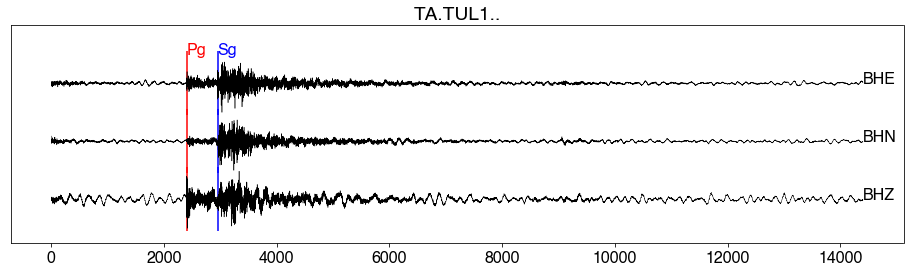

In [256]:
plot_phases(pgpairs[6])

In [258]:
df = pd.read_csv('quakeml/201330_cat_quakeml.csv')
df = df.fillna('NaN')                       # small detail
df = df[(df['Pn']!='NaN')&(df['Sn']!='NaN')]
pnpairs = pair_data_waveforms(df,'Pn')

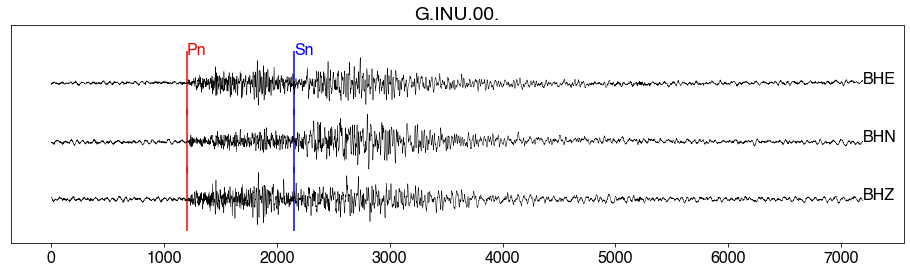

In [264]:
plot_phases(pnpairs[9])